In [134]:
import pandas as pd 

pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [135]:
df_orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')

df_order_payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')

df_order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')

df_products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')

df_sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')

df_customers = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')

df_geolocation = pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')

df_products_cat_translated = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

display("orders", df_orders.head(1), "order_payments", df_order_payments.head(1),
        "order_reivews", df_order_reviews.head(1), "order_items", df_order_items.head(1),
        "products", df_products.head(1), "products_cat_translated", df_products_cat_translated.head(1),
        "sellers", df_sellers.head(1),
        "customers", df_customers.head(1), "geolocation", df_geolocation.head(1))

'orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


'order_payments'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


'order_reivews'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


'order_items'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


'products'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


'products_cat_translated'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


'sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


'customers'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


'geolocation'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [136]:
print(df_orders.shape)
df_orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [137]:
print(df_orders.order_id.nunique(), df_orders.customer_id.nunique(), len(df_orders))

99441 99441 99441


In [138]:
df_orders[df_orders['order_status']=='canceled'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 397 to 99347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       625 non-null    object
 1   customer_id                    625 non-null    object
 2   order_status                   625 non-null    object
 3   order_purchase_timestamp       625 non-null    object
 4   order_approved_at              484 non-null    object
 5   order_delivered_carrier_date   75 non-null     object
 6   order_delivered_customer_date  6 non-null      object
 7   order_estimated_delivery_date  625 non-null    object
dtypes: object(8)
memory usage: 43.9+ KB


In [139]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [140]:
print(df_order_payments.shape)
df_order_payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [141]:
print(df_order_payments.order_id.nunique())

99440


In [142]:
tmp = df_order_payments[df_order_payments['order_id'].duplicated()]
tmp

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [143]:
df_order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [144]:
df_order_payments[df_order_payments['payment_installments'] > 1]['payment_type'].value_counts()

credit_card    51338
Name: payment_type, dtype: int64

In [145]:
df_order_payments[(df_order_payments['payment_type'] == 'credit_card') & (df_order_payments['payment_sequential'] > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
199,332c6742772f2df936696b6512b10edb,2,credit_card,6,134.55
949,98f0e2b0d85754ca3b4e06d70f0f63a2,2,credit_card,2,70.00
1102,5373c26702420c0f842871e489365e20,2,credit_card,1,12.59
1135,eca3005a4f60ceb77b67a30b74095ddf,2,credit_card,1,3.99
1294,b18478bbf9b2283e3d12452f69fd9ce2,2,credit_card,1,79.92
...,...,...,...,...,...
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54
102341,407cc9b2c7575dbff71cb23b6cc26814,2,credit_card,7,76.39
102674,ef13a698cf88c9e17ccca0261e0b9e7a,2,credit_card,8,94.49
102724,55adc5cef9556477770f0b858669f8fc,2,credit_card,2,65.55


In [146]:
df_order_payments[df_order_payments['order_id'] == '11c177c8e97725db2631073c19f07b62']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1026,11c177c8e97725db2631073c19f07b62,1,credit_card,4,441.16


In [147]:
df_order_payments[df_order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [148]:
print(df_order_reviews.shape)
df_order_reviews.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [149]:
print(df_order_reviews['review_id'].nunique())
print(df_order_reviews['order_id'].nunique())

98410
98673


In [150]:
tmp = df_order_reviews[df_order_reviews['review_id'].duplicated()]
print(tmp.shape)
tmp.head()

(814, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18


In [151]:
df_order_reviews[df_order_reviews['review_id'] == '308316408775d1600dad81bd3184556d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4545,308316408775d1600dad81bd3184556d,27e5ed2ecefbe0bcc9ae0c9b26b763c3,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
53661,308316408775d1600dad81bd3184556d,8b3c2785144e72ccba9b0213f0f1cd1e,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09


In [152]:
tmp = df_order_reviews[df_order_reviews['order_id'].duplicated()]
print(tmp.shape)
tmp.head()

(551, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [153]:
df_order_reviews[df_order_reviews['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4753,3c95105686e2ae71e8fd94b6483eba79,f9c78e6e58306dc81efbbada1ac11f24,2,NaN,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [154]:
df_order_reviews['review_score'].value_counts(normalize = True)

5    0.577763
4    0.192917
1    0.115133
3    0.082430
2    0.031756
Name: review_score, dtype: float64

In [155]:
print(df_order_reviews['review_comment_title'].isnull().sum() / len(df_order_reviews))
print(df_order_reviews['review_comment_message'].isnull().sum() / len(df_order_reviews))

0.8834153027493349
0.5870253164556962


In [156]:
df_order_reviews['review_comment_title'].str.len().describe()

count    11568.000000
mean        11.945021
std          6.328580
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max         26.000000
Name: review_comment_title, dtype: float64

In [157]:
df_order_reviews['review_comment_message'].str.len().describe()

count    40977.000000
mean        68.637675
std         53.849207
min          1.000000
25%         28.000000
50%         53.000000
75%         95.000000
max        208.000000
Name: review_comment_message, dtype: float64

In [158]:
print(df_order_items.shape)
df_order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [159]:
tmp = df_order_items[df_order_items['order_id'].duplicated()]
print(tmp.shape)
tmp.head()

(13984, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [160]:
df_order_items[df_order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [161]:
df_order_items[df_order_items['order_item_id'] == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


In [162]:
df_order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [163]:
tmp = df_order_items[df_order_items['product_id'].duplicated()]
print(tmp.shape)
tmp.head()

(79699, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
41,0019c29108428acffd089c36103c9440,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.90,19.95
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [164]:
tmp = df_order_items[df_order_items['seller_id'].duplicated()]
print(tmp.shape)
tmp.head()

(109555, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
41,0019c29108428acffd089c36103c9440,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.90,19.95
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [165]:
print(df_products.shape)
df_products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [166]:
print(df_products_cat_translated.shape)
df_products_cat_translated.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [167]:
df_products[df_products['product_id'].duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [168]:
print('The Number of Product Category: ', df_products['product_category_name'].nunique(), '\n')

print('Top 20 categoy by the number of product:')
df_products['product_category_name'].value_counts().head(20)

The Number of Product Category:  73 

Top 20 categoy by the number of product:


cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
Name: product_category_name, dtype: int64

In [169]:
print(df_sellers.shape)
df_sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [170]:
df_sellers[df_sellers['seller_id'].duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [171]:
print(df_customers.shape)
df_customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [172]:
df_customers[df_customers['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [173]:
tmp = df_customers[df_customers['customer_unique_id'].duplicated()]
print(tmp.shape)
tmp.head()

(3345, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP


In [174]:
print('The distinct number of customers:', format(df_customers['customer_unique_id'].nunique(),','), '\n')
df_customers[df_customers['customer_unique_id'] == 'a40096fc0a3862e9e12bc55b5f8e6ab2']

The distinct number of customers: 96,096 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
197,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
35912,039bbed64cc5e2160b7ca4ac6b09449c,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ


In [175]:
print(df_geolocation.shape)
df_geolocation.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [176]:
import sqlite3
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo = False)

df_orders.to_sql(name = 'orders', con = engine)
df_order_payments.to_sql(name = 'order_payments', con = engine)
df_order_reviews.to_sql(name = 'order_reviews', con = engine)
df_order_items.to_sql(name = 'order_items', con = engine)

df_products.to_sql(name = 'products', con = engine)
df_products_cat_translated.to_sql(name = 'products_cat_translated', con = engine)
df_sellers.to_sql(name = 'sellers', con = engine)
df_customers.to_sql(name = 'customers', con = engine)

df_geolocation.to_sql(name = 'geolocation', con = engine)

In [177]:
query = "SELECT * FROM sqlite_master"
db = pd.read_sql_query(sql = query, con = engine)
db[db['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,orders,orders,2,"CREATE TABLE orders (\n\t""index"" BIGINT, \n\to..."
2,table,order_payments,order_payments,5018,"CREATE TABLE order_payments (\n\t""index"" BIGIN..."
4,table,order_reviews,order_reviews,7037,"CREATE TABLE order_reviews (\n\t""index"" BIGINT..."
6,table,order_items,order_items,11112,"CREATE TABLE order_items (\n\t""index"" BIGINT, ..."
8,table,products,products,15647,"CREATE TABLE products (\n\t""index"" BIGINT, \n\..."
10,table,products_cat_translated,products_cat_translated,16341,"CREATE TABLE products_cat_translated (\n\t""ind..."
12,table,sellers,sellers,16343,"CREATE TABLE sellers (\n\t""index"" BIGINT, \n\t..."
14,table,customers,customers,16400,"CREATE TABLE customers (\n\t""index"" BIGINT, \n..."
16,table,geolocation,geolocation,19042,"CREATE TABLE geolocation (\n\t""index"" BIGINT, ..."


In [178]:
for i in db[db['type'] == 'table']['sql']:
    print(i)

CREATE TABLE orders (
	"index" BIGINT, 
	order_id TEXT, 
	customer_id TEXT, 
	order_status TEXT, 
	order_purchase_timestamp TEXT, 
	order_approved_at TEXT, 
	order_delivered_carrier_date TEXT, 
	order_delivered_customer_date TEXT, 
	order_estimated_delivery_date TEXT
)
CREATE TABLE order_payments (
	"index" BIGINT, 
	order_id TEXT, 
	payment_sequential BIGINT, 
	payment_type TEXT, 
	payment_installments BIGINT, 
	payment_value FLOAT
)
CREATE TABLE order_reviews (
	"index" BIGINT, 
	review_id TEXT, 
	order_id TEXT, 
	review_score BIGINT, 
	review_comment_title TEXT, 
	review_comment_message TEXT, 
	review_creation_date TEXT, 
	review_answer_timestamp TEXT
)
CREATE TABLE order_items (
	"index" BIGINT, 
	order_id TEXT, 
	order_item_id BIGINT, 
	product_id TEXT, 
	seller_id TEXT, 
	shipping_limit_date TEXT, 
	price FLOAT, 
	freight_value FLOAT
)
CREATE TABLE products (
	"index" BIGINT, 
	product_id TEXT, 
	product_category_name TEXT, 
	product_name_lenght FLOAT, 
	product_description_lengh

In [179]:
query = "select * from orders where order_delivered_customer_date between '2018-01-01 00:00:00' and '2018-01-15 00:00:00'"

pd.read_sql_query(query, engine).head(2)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,17,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2017-12-26 23:50:22,2017-12-28 18:33:05,2018-01-08 22:36:36,2018-01-29 00:00:00
1,32,989225ba6d0ebd5873335f7e01de2ae7,816f8653d5361cbf94e58c33f2502a5c,delivered,2017-12-12 13:56:04,2017-12-14 13:54:13,2017-12-16 00:18:57,2018-01-03 18:03:36,2018-01-08 00:00:00


In [180]:
query = "select * from orders where strftime('%Y', order_delivered_customer_date) = '2018'"

pd.read_sql_query(query, engine).head(2)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
1,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [181]:
query = "select * from orders where date(order_delivered_customer_date) = '2018-01-01'"

pd.read_sql_query(query, engine).head(2)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,28299,8edbc0b60816d6644dbe422dedc06681,111fbf59e7bf74622feb0006b74c4286,delivered,2017-12-18 18:51:42,2017-12-18 20:30:23,2017-12-20 19:25:39,2018-01-01 05:47:11,2018-01-16 00:00:00


In [182]:
query = """
        SELECT  yearmonth,
                score_5,
                count_all,
                ROUND(CAST(score_5 AS float) / CAST(count_all AS float) * 100, 2) AS percentage
        FROM    (
                SELECT STRFTIME('%Y-%m', A.review_answer_timestamp) AS yearmonth ,
                       SUM(CASE WHEN A.review_score = 5 THEN 1 ELSE 0 END) AS score_5,
                       COUNT(DISTINCT A.order_id) AS count_all
                FROM   order_reviews AS A
                LEFT
                JOIN   orders AS B
                ON     A.order_id = B.order_id
                WHERE  B.order_status = 'delivered'
                AND    STRFTIME('%Y', A.review_answer_timestamp) = '2018'
                GROUP
                BY     yearmonth
                )
        """

df_query_1 = pd.read_sql_query(query, engine)
df_query_1

,yearmonth,score_5,count_all,percentage
0,2018-01,3539,6120,57.83
1,2018-02,3378,5882,57.43
2,2018-03,3750,7355,50.99
3,2018-04,4023,7421,54.21
4,2018-05,4551,7366,61.78
5,2018-06,3835,6264,61.22
6,2018-07,3743,5737,65.24
7,2018-08,5441,8544,63.68
8,2018-09,401,620,64.68
9,2018-10,22,31,70.97


In [183]:
query = """
        SELECT  year,
                score_5,
                count_all,
                ROUND(CAST(score_5 AS float) / CAST(count_all AS float) * 100, 2) AS percentage
        FROM    (
                SELECT STRFTIME('%Y', A.review_answer_timestamp) AS year ,
                       SUM(CASE WHEN A.review_score = 5 THEN 1 ELSE 0 END) AS score_5,
                       COUNT(DISTINCT A.order_id) AS count_all
                FROM   order_reviews AS A
                LEFT
                JOIN   orders AS B
                ON     A.order_id = B.order_id
                WHERE  B.order_status = 'delivered'
                AND    STRFTIME('%Y', A.review_answer_timestamp) = '2018'
                )
        """

df_query_1_1 = pd.read_sql_query(query, engine)
df_query_1_1

,year,score_5,count_all,percentage
0,2018,32683,55304,59.1


In [184]:
query = """
        SELECT Month as Month_no
              ,CASE WHEN a.Month = '01' THEN 'Jan'
                    WHEN a.Month = '02' THEN 'Feb'
                    WHEN a.Month = '03' THEN 'Mar'
                    WHEN a.Month = '04' THEN 'Apr'
                    WHEN a.Month = '05' THEN 'May'
                    WHEN a.Month = '06' THEN 'Jun'
                    WHEN a.Month = '07' THEN 'Jul'
                    WHEN a.Month = '08' THEN 'Aug'
                    WHEN a.Month = '09' THEN 'Sep'
                    WHEN a.Month = '10' THEN 'Oct'
                    WHEN a.Month = '11' THEN 'Nov'
                    WHEN a.Month = '12' THEN 'Dec'
                    ELSE 0 END AS Month
              ,SUM(CASE WHEN a.Year = '2016' THEN 1 ELSE 0 END) AS Year2016
              ,SUM(CASE WHEN a.Year = '2017' THEN 1 ELSE 0 END) AS Year2017
              ,SUM(CASE WHEN a.Year = '2018' THEN 1 ELSE 0 END) AS Year2018
        FROM  (
              SELECT  customer_id,
                      order_id,
                      order_status,
                      order_purchase_timestamp,
                      STRFTIME('%Y', order_purchase_timestamp) AS Year,
                      STRFTIME('%m', order_purchase_timestamp) AS Month
                FROM  orders
               WHERE  order_status <> 'unavailable'
                 AND  order_status <> 'canceled'
               GROUP
                  BY  customer_id, order_id
               ORDER
                  BY  order_purchase_timestamp              
              ) AS a
       GROUP
          BY  Month
       ORDER
          BY  Month_no ASC
        
        """
df_query_2 = pd.read_sql_query(sql=query, con=engine)
df_query_2

,Month_no,Month,Year2016,Year2017,Year2018
0,01,Jan,0,787,7187
1,02,Feb,0,1718,6625
2,03,Mar,0,2617,7168
3,04,Apr,0,2377,6919
4,05,May,0,3640,6833
5,06,Jun,0,3205,6145
6,07,Jul,0,3946,6233
7,08,Aug,0,4272,6421
8,09,Sep,2,4227,1
9,10,Oct,293,4547,0


In [185]:
query = """

              SELECT  customer_id,
                      order_id,
                      order_status,
                      order_purchase_timestamp,
                      STRFTIME('%Y', order_purchase_timestamp) AS Year,
                      STRFTIME('%m', order_purchase_timestamp) AS Month
                FROM  orders
               WHERE  order_status <> 'unavailable'
                 AND  order_status <> 'canceled'
               GROUP
                  BY  customer_id, order_id
               ORDER
                  BY  order_purchase_timestamp              

        
        """
df_query_2 = pd.read_sql_query(sql=query, con=engine)
df_query_2

,customer_id,order_id,order_status,order_purchase_timestamp,Year,Month
0,08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016,09
1,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016,09
2,355077684019f7f60a031656bd7262b8,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,2016,10
3,7ec40b22510fdbea1b08921dd39e63d8,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016,10
4,6f989332712d3222b6571b1cf5b835ce,a41c8759fbe7aab36ea07e038b2d4465,delivered,2016-10-03 21:13:36,2016,10
...,...,...,...,...,...,...
98202,e60df9449653a95af4549bbfcb18a6eb,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018,08
98203,6e353700bc7bcdf6ebc15d6de16d7002,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018,08
98204,496630b6740bcca28fce9ba50d8a26ef,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018,08
98205,898b7fee99c4e42170ab69ba59be0a8b,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018,08


In [186]:
query = """
        SELECT  STRFTIME('%Y', order_purchase_timestamp) AS Year,
                COUNT(DISTINCT customer_id) AS Num_Purchase
          FROM  orders
         WHERE  order_status <> 'unavailable'
           AND  order_status <> 'canceled'
         GROUP
            BY  Year
         ORDER
            BY  Year        
        """

Year = pd.read_sql(query, engine)
Year

,Year,Num_Purchase
0,2016,296
1,2017,44379
2,2018,53532


In [187]:
query = """
        SELECT  STRFTIME('%Y-%m', order_purchase_timestamp) AS YearMonth,
                COUNT(DISTINCT customer_id) AS Num_Purchase
          FROM  orders
         WHERE  order_status <> 'unavailable'
           AND  order_status <> 'canceled'
         GROUP
            BY  YearMonth
         ORDER
            BY  YearMonth        
        """

YearMonth = pd.read_sql(query, engine)
YearMonth

,YearMonth,Num_Purchase
0,2016-09,2
1,2016-10,293
2,2016-12,1
3,2017-01,787
4,2017-02,1718
5,2017-03,2617
6,2017-04,2377
7,2017-05,3640
8,2017-06,3205
9,2017-07,3946


In [188]:
query = """
        SELECT  STRFTIME('%m', order_purchase_timestamp) AS Month,
                COUNT(DISTINCT customer_id) AS Num_Purchase
          FROM  orders
         WHERE  order_status <> 'unavailable'
           AND  order_status <> 'canceled'
         GROUP
            BY  Month
         ORDER
            BY  Month        
        """

Month = pd.read_sql(query, engine)
Month

,Month,Num_Purchase
0,01,7974
1,02,8343
2,03,9785
3,04,9296
4,05,10473
5,06,9350
6,07,10179
7,08,10693
8,09,4230
9,10,4840


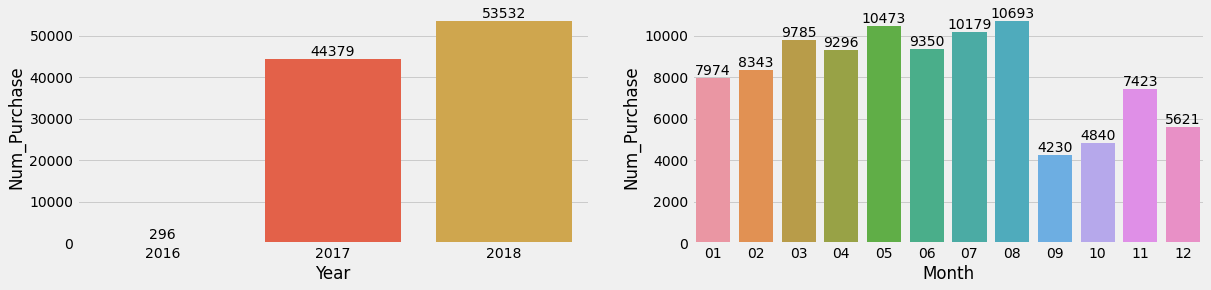

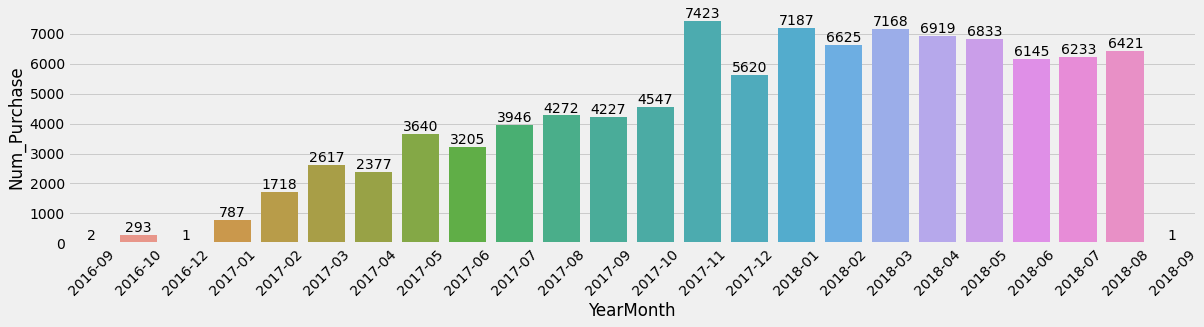

In [189]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.barplot(data = Year, x = 'Year', y = 'Num_Purchase', ax=ax1)
sns.barplot(data = Month, x = 'Month', y = 'Num_Purchase', ax=ax2)
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.barplot(data = YearMonth, x = 'YearMonth', y = 'Num_Purchase', ax=ax3)
plt.xticks(rotation = 45)
ax3.bar_label(ax3.containers[0])

plt.show()

In [190]:
query = """
        SELECT a.payment_type, 
               COUNT(a.payment_type) AS count_pay_type,
               CAST(SUM(a.payment_value) AS int) / 1000 AS 'value_pay_type(K)'
        FROM   order_payments AS a
        LEFT 
        JOIN   orders AS b
        ON     a.order_id = b.order_id
        WHERE  b.order_status <> 'canceled'
        AND    b.order_delivered_customer_date IS NOT NULL
        GROUP
        BY     payment_type
        ORDER  
        BY     count_pay_type DESC
        """

df_query_3 = pd.read_sql_query(query , engine)
df_query_3

,payment_type,count_pay_type,value_pay_type(K)
0,credit_card,74579,12100
1,boleto,19191,2769
2,voucher,5493,343
3,debit_card,1485,208


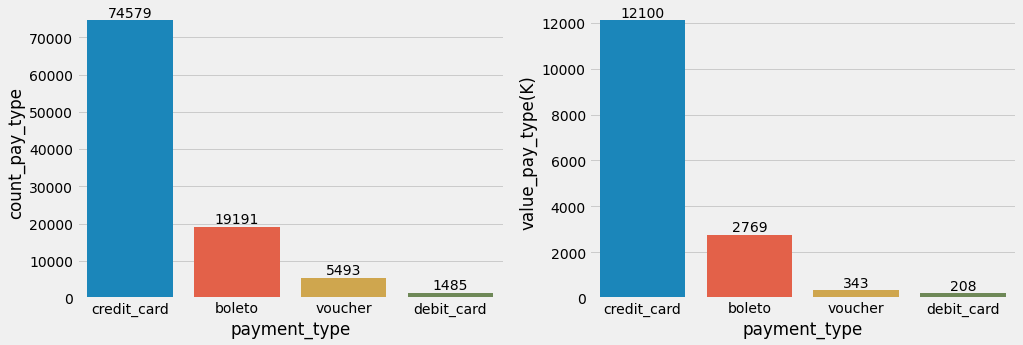

In [191]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(data=df_query_3, x='payment_type', y = 'count_pay_type', ax = axes[0])
axes[0].bar_label(axes[0].containers[0])

sns.barplot(data=df_query_3, x='payment_type', y = 'value_pay_type(K)', ax = axes[1])
axes[1].bar_label(axes[1].containers[0])

plt.show()

In [192]:
query1 = """
        SELECT P.product_category_name_english AS Category,
               COUNT(DISTINCT P.order_id) AS Num_order,
               SUM(P.payment_value) AS Revenue
        FROM   (
               SELECT *
               FROM   products AS a
               LEFT
               JOIN   products_cat_translated AS b
               ON     a.product_category_name = b.product_category_name
               LEFT
               JOIN   order_items AS c
               ON     a.product_id = c.product_id
               LEFT
               JOIN   orders AS d
               ON     c.order_id = d.order_id
               LEFT
               JOIN   order_payments AS e
               ON     c.order_id = e.order_id
               
               ) AS P
        WHERE  Category IS NOT NULL   
        AND    P.order_status <> 'canceled'
        AND    P.order_delivered_customer_date IS NOT NULL
        GROUP
        BY     Category
        ORDER
        BY     Revenue DESC
        LIMIT  10
        """

query2 = """
        SELECT P.product_category_name_english AS Category,
               COUNT(DISTINCT P.order_id) AS Num_order,
               SUM(P.payment_value) AS Revenue
        FROM   (
               SELECT *
               FROM   products AS a
               LEFT
               JOIN   products_cat_translated AS b
               ON     a.product_category_name = b.product_category_name
               LEFT
               JOIN   order_items AS c
               ON     a.product_id = c.product_id
               LEFT
               JOIN   orders AS d
               ON     c.order_id = d.order_id
               LEFT
               JOIN   order_payments AS e
               ON     c.order_id = e.order_id
               
               ) AS P
        WHERE  Category IS NOT NULL   
        AND    P.order_status <> 'canceled'
        AND    P.order_delivered_customer_date IS NOT NULL
        GROUP
        BY     Category
        ORDER
        BY     Revenue ASC
        LIMIT  10
        """

query_4_top10 = pd.read_sql_query(query1, engine)
query_4_bottom10 = pd.read_sql_query(query2, engine)

display(query_4_top10, query_4_bottom10)

,Category,Num_order,Revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8647,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


In [193]:
query = """
        SELECT  S.product_category_name_english AS Category,
                S.seller_id,
                SUM(S.payment_value) AS Revenue
        FROM    (
                SELECT  * 
                FROM    sellers AS a
                LEFT    
                JOIN    order_items AS b
                ON      a.seller_id = b.seller_id
                LEFT
                JOIN    products AS c
                ON      b.product_id = c.product_id
                LEFT
                JOIN    products_cat_translated AS d
                ON      c.product_category_name = d.product_category_name
                LEFT
                JOIN    order_payments AS e
                ON      b.order_id = e.order_id
                LEFT
                JOIN    orders AS f                                
                ON      b.order_id = f.order_id
                ) AS S
        WHERE   Category IS NOT NULL
        AND     S.order_status <> 'canceled'
        AND     S.order_delivered_customer_date IS NOT NULL
        GROUP
        BY      Category, seller_id
        ORDER
        BY      Category, Revenue DESC
        """

query_5 = pd.read_sql_query(query, engine)
print(query_5['seller_id'].nunique())
query_5

2912


,Category,seller_id,Revenue
0,agro_industry_and_commerce,e59aa562b9f8076dd550fcddf0e73491,38875.08
1,agro_industry_and_commerce,f08a5b9dd6767129688d001acafc21e5,38203.91
2,agro_industry_and_commerce,6bd69102ab48df500790a8cecfc285c2,8359.02
3,agro_industry_and_commerce,2528744c5ef5d955adc318720a94d2e7,6508.70
4,agro_industry_and_commerce,31ae0774c17fabd06ff707cc5bde005f,5690.23
...,...,...,...
6139,watches_gifts,89f69225956f951295ca4c7fb1266553,71.37
6140,watches_gifts,2ff97219cb8622eaf3cd89b7d9c09824,56.22
6141,watches_gifts,891071be6ba827b591264c90c2ae8a63,35.96
6142,watches_gifts,1da3aeb70d7989d1e6d9b0e887f97c23,27.22


In [194]:
grouped = query_5.groupby(['Category'])
top_10_per_cat = lambda g : g.sort_values(by = 'Revenue', ascending = False)[:10]

a = grouped.apply(top_10_per_cat)[['seller_id', 'Revenue']]
a

seller_id   Revenue
Category                                                                   
agro_industry_and_commerce 0     e59aa562b9f8076dd550fcddf0e73491  38875.08
                           1     f08a5b9dd6767129688d001acafc21e5  38203.91
                           2     6bd69102ab48df500790a8cecfc285c2   8359.02
                           3     2528744c5ef5d955adc318720a94d2e7   6508.70
                           4     31ae0774c17fabd06ff707cc5bde005f   5690.23
...                                                           ...       ...
watches_gifts              6054  634964b17796e64304cadf1ad3050fb7  76433.52
                           6055  2bf6a2c1e71bbd29a4ad64e6d3c3629f  54176.72
                           6056  966cb4760537b1404caedd472cc610a5  47939.28
                           6057  b33e7c55446eabf8fe1a42d037ac7d6d  39590.53
                           6058  86ccac0b835037332a596a33b6949ee1  28802.35

[647 rows x 2 columns]

In [195]:
a = a.droplevel(axis=0, level=1).reset_index()
a

,Category,seller_id,Revenue
0,agro_industry_and_commerce,e59aa562b9f8076dd550fcddf0e73491,38875.08
1,agro_industry_and_commerce,f08a5b9dd6767129688d001acafc21e5,38203.91
2,agro_industry_and_commerce,6bd69102ab48df500790a8cecfc285c2,8359.02
3,agro_industry_and_commerce,2528744c5ef5d955adc318720a94d2e7,6508.70
4,agro_industry_and_commerce,31ae0774c17fabd06ff707cc5bde005f,5690.23
...,...,...,...
642,watches_gifts,634964b17796e64304cadf1ad3050fb7,76433.52
643,watches_gifts,2bf6a2c1e71bbd29a4ad64e6d3c3629f,54176.72
644,watches_gifts,966cb4760537b1404caedd472cc610a5,47939.28
645,watches_gifts,b33e7c55446eabf8fe1a42d037ac7d6d,39590.53


In [196]:
a.loc[a['Category'] == 'agro_industry_and_commerce']

,Category,seller_id,Revenue
0,agro_industry_and_commerce,e59aa562b9f8076dd550fcddf0e73491,38875.08
1,agro_industry_and_commerce,f08a5b9dd6767129688d001acafc21e5,38203.91
2,agro_industry_and_commerce,6bd69102ab48df500790a8cecfc285c2,8359.02
3,agro_industry_and_commerce,2528744c5ef5d955adc318720a94d2e7,6508.70
4,agro_industry_and_commerce,31ae0774c17fabd06ff707cc5bde005f,5690.23
5,agro_industry_and_commerce,6481e96574816ead57975da2c0f6d80d,2837.23
6,agro_industry_and_commerce,cfd7ddab722b902f7ac5b5f3ba6d723d,2268.88
7,agro_industry_and_commerce,d17f467e4bf608a510c20d82f4ba3b6b,2168.58
8,agro_industry_and_commerce,397c4d0c005b6f41f90098ac724e28cb,1978.18
9,agro_industry_and_commerce,a420f60ff1aa9acc80d0e42959f2b313,1269.50


In [197]:

query = """
        SELECT  S.customer_state, sum(S.payment_value) AS Revenue
        FROM    (
                SELECT  a.customer_id, customer_state, payment_value
                FROM    customers AS a
                LEFT
                JOIN    orders AS b
                ON      a.customer_id = b.customer_id
                LEFT
                JOIN    order_payments AS c
                ON      b.order_id = c.order_id
                WHERE   order_status <> 'canceled'
                AND     order_delivered_customer_date IS NOT NULL
                ) AS S
        GROUP
        BY      customer_state
        ORDER
        BY      Revenue Desc
        """

query_6_1 = pd.read_sql_query(query, engine)
query_6_1

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


In [198]:

query = """
        SELECT  S.customer_state, S.product_category_name, SUM(S.payment_value) AS Revenue
        FROM    (
                SELECT  a.customer_id, customer_state, payment_value, product_category_name
                FROM    customers AS a
                LEFT
                JOIN    orders AS b
                ON      a.customer_id = b.customer_id
                LEFT
                JOIN    order_payments AS c
                ON      b.order_id = c.order_id
                LEFT
                JOIN    order_items AS d
                ON      b.order_id = d.order_id
                LEFT
                JOIN    products AS e
                ON      d.product_id = e.product_id
                WHERE   order_status <> 'canceled'
                AND     order_delivered_customer_date IS NOT NULL
                AND     product_category_name IS NOT NULL
                ) AS S
        GROUP
        BY      customer_state, product_category_name
        ORDER
        BY      Revenue Desc
        """

query_6_2 = pd.read_sql_query(query, engine)
query_6_2

,customer_state,product_category_name,Revenue
0,SP,cama_mesa_banho,756727.97
1,SP,informatica_acessorios,622212.26
2,SP,beleza_saude,604558.90
3,SP,moveis_decoracao,533872.18
4,SP,esporte_lazer,509044.62
...,...,...,...
1357,BA,casa_conforto_2,29.69
1358,GO,dvds_blu_ray,28.01
1359,ES,casa_conforto_2,28.00
1360,PR,casa_conforto_2,28.00


In [199]:
grouped = query_6_2.groupby('customer_state')
top_5_cat = lambda g : g.sort_values(by = 'Revenue', ascending = False)[:5]

a = grouped.apply(top_5_cat)[['product_category_name', 'Revenue']]
a = a.droplevel(axis = 0, level = 1).reset_index()
a.head(10)

,customer_state,product_category_name,Revenue
0,AC,moveis_decoracao,5261.23
1,AC,esporte_lazer,2071.54
2,AC,beleza_saude,2067.62
3,AC,informatica_acessorios,1765.24
4,AC,relogios_presentes,1573.72
5,AL,beleza_saude,14741.33
6,AL,informatica_acessorios,14280.47
7,AL,relogios_presentes,13249.34
8,AL,moveis_decoracao,7654.74
9,AL,automotivo,5819.53


In [200]:
a.customer_state.value_counts()

AC    5
PB    5
SP    5
SE    5
SC    5
RS    5
RR    5
RO    5
RN    5
RJ    5
PR    5
PI    5
PE    5
PA    5
AL    5
MT    5
MS    5
MG    5
MA    5
GO    5
ES    5
DF    5
CE    5
BA    5
AP    5
AM    5
TO    5
Name: customer_state, dtype: int64

In [202]:
query = """
         SELECT  a.state, a.num_customer, b.num_seller
         FROM    (
                 SELECT  customer_state AS state, 
                         COUNT(DISTINCT(customer_unique_id)) AS num_customer
                 FROM    customers
                 GROUP
                 BY      state 
                 ) AS a
                 LEFT
                 JOIN   (
                        SELECT  seller_state AS state, 
                        COUNT(DISTINCT(seller_id)) AS num_seller 
                        FROM    sellers
                        GROUP
                        BY      state
                        )  AS b
                 ON     a.state = b.state      
         ORDER
         BY      num_customer DESC
         """

query_6_3 = pd.read_sql_query(query, engine)
query_6_3

,state,num_customer,num_seller
0,SP,40302,1849.0
1,RJ,12384,171.0
2,MG,11259,244.0
3,RS,5277,129.0
4,PR,4882,349.0
5,SC,3534,190.0
6,BA,3277,19.0
7,DF,2075,30.0
8,ES,1964,23.0
9,GO,1952,40.0


In [203]:


query = """
        SELECT  customer_state AS State,
                CAST(AVG(JULIANDAY(Date_est_del) - JULIANDAY(Date_approved)) AS int) AS DateDiff
        FROM    (
                SELECT  order_id,
                        customer_id, 
                        STRFTIME('%Y-%m-%d', order_approved_at) AS Date_approved,
                        STRFTIME('%Y-%m-%d', order_estimated_delivery_date) AS Date_est_del
                FROM    orders
                WHERE   order_status <> 'canceled'
                AND     order_approved_at IS NOT NULL
                ) AS A
                LEFT
                JOIN    (
                        SELECT  customer_id,
                                customer_state
                        FROM customers
                        ) AS B
                ON      A.customer_id = B.customer_id

        GROUP
        BY      State  
        ORDER
        BY      DateDiff
        """

query_7 = pd.read_sql_query(query, engine)
query_7

,State,DateDiff
0,SP,19
1,DF,24
2,MG,24
3,PR,24
4,ES,25
5,SC,25
6,MS,26
7,RJ,26
8,GO,27
9,RS,28


In [204]:

query = """
        SELECT  *,
                CASE WHEN first_pur < recent_pur THEN 'Y' ELSE 'N' END AS repurchase,
                CAST(JULIANDAY(recent_pur) - JULIANDAY(first_pur) AS int) AS interval_pur,
                CASE WHEN count_order - 1 = 0 OR JULIANDAY(recent_pur) - JULIANDAY(first_pur) = 0 THEN 0
                     ELSE CAST((JULIANDAY(recent_pur) - JULIANDAY(first_pur)) / (count_order-1) AS int) END AS cycle_pur
        FROM    (
                SELECT  customer_unique_id,
                        MIN(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS first_pur,
                        MAX(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS recent_pur,
                        COUNT(DISTINCT A.order_id) AS count_order,
                        cat_name
                FROM    (
                        SELECT  customer_unique_id, a.order_id, order_purchase_timestamp, c.product_id
                        FROM    orders AS a
                        LEFT
                        JOIN    customers AS b
                        ON      a.customer_id = b.customer_id
                        LEFT
                        JOIN    order_items AS c
                        ON      a.order_id = c.order_id
                        WHERE   order_status <> 'canceled'
                        ) as A
                LEFT
                JOIN   (
                        SELECT product_id, product_category_name_english AS cat_name
                        FROM   products AS d
                        LEFT
                        JOIN   products_cat_translated AS e
                        ON     d.product_category_name = e.product_category_name
                        ) AS f
                ON      A.product_id = f.product_id
                WHERE   cat_name = 'bed_bath_table'
                GROUP
                BY      customer_unique_id
                )
        """

repur_bed_bath_tab = pd.read_sql_query(query, engine)
repur_bed_bath_tab

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,1,bed_bath_table,N,0,0
1,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18,2017-07-18,1,bed_bath_table,N,0,0
2,00090324bbad0e9342388303bb71ba0a,2018-03-24,2018-03-24,1,bed_bath_table,N,0,0
3,000c8bdb58a29e7115cfc257230fb21b,2017-12-12,2017-12-12,1,bed_bath_table,N,0,0
4,000de6019bb59f34c099a907c151d855,2017-08-17,2017-08-17,1,bed_bath_table,N,0,0
...,...,...,...,...,...,...,...,...
9122,ffd973d43cadfa3e60340bcad8d87696,2017-11-26,2017-11-26,1,bed_bath_table,N,0,0
9123,ffe254cc039740e17dd15a5305035928,2017-04-02,2017-04-02,2,bed_bath_table,N,0,0
9124,ffe2dd1f3b0cbf0b5f35e818ec03c49b,2017-03-05,2017-03-05,1,bed_bath_table,N,0,0
9125,ffe39c116d96cd81dcdfd9dcca655cd1,2017-07-24,2017-07-24,1,bed_bath_table,N,0,0


In [205]:
repur_bed_bath_tab.loc[(repur_bed_bath_tab.repurchase == 'Y') & (repur_bed_bath_tab.count_order >= 2)]

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
55,0178b244a5c281fb2ade54038dd4b161,2017-05-10,2018-07-28,2,bed_bath_table,Y,444,444
92,02e9109b7e0a985108b43e573b6afb23,2018-05-13,2018-05-14,2,bed_bath_table,Y,1,1
106,0333b2fc6ba7014702e08ef613850270,2017-08-24,2017-11-06,2,bed_bath_table,Y,74,74
138,043aee247e71edff7045664609f4d806,2017-03-22,2017-07-17,2,bed_bath_table,Y,117,117
146,048dbdf8f9bbd1be87b25868d1408311,2017-10-17,2017-11-06,2,bed_bath_table,Y,20,20
...,...,...,...,...,...,...,...,...
8887,f8f6ed51ded0d4757a6153f5ce0f8906,2018-04-16,2018-04-25,2,bed_bath_table,Y,9,9
8966,fb4accbcbcd54672a8a8b195d9ff0ec8,2017-07-24,2017-08-16,2,bed_bath_table,Y,23,23
8977,fb920961e4d8e55fd9c357976a611765,2017-03-25,2018-06-24,2,bed_bath_table,Y,456,456
9045,fd8ccc89be43894d2553494c71a61fd8,2018-03-13,2018-04-19,2,bed_bath_table,Y,37,37


In [206]:
print("***Ratio of repurchase - bed_bath_table***")
round(repur_bed_bath_tab['repurchase'].value_counts(normalize=True)*100, 2)

***Ratio of repurchase - bed_bath_table***


N    98.5
Y     1.5
Name: repurchase, dtype: float64

In [208]:
query = """
        SELECT  *,
                CASE WHEN first_pur < recent_pur THEN 'Y' ELSE 'N' END AS repurchase,
                CAST(JULIANDAY(recent_pur) - JULIANDAY(first_pur) AS int) AS interval_pur,
                CASE WHEN count_order - 1 = 0 OR JULIANDAY(recent_pur) - JULIANDAY(first_pur) = 0 THEN 0
                     ELSE CAST((JULIANDAY(recent_pur) - JULIANDAY(first_pur)) / (count_order-1) AS int) END AS cycle_pur
        FROM    (
                SELECT  customer_unique_id,
                        MIN(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS first_pur,
                        MAX(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS recent_pur,
                        COUNT(DISTINCT A.order_id) AS count_order,
                        cat_name
                FROM    (
                        SELECT  customer_unique_id, a.order_id, order_purchase_timestamp, c.product_id
                        FROM    orders AS a
                        LEFT
                        JOIN    customers AS b
                        ON      a.customer_id = b.customer_id
                        LEFT
                        JOIN    order_items AS c
                        ON      a.order_id = c.order_id
                        WHERE   order_status <> 'canceled'
                        ) AS A
                LEFT
                JOIN   (
                        SELECT product_id, product_category_name_english AS cat_name
                        FROM   products AS d
                        LEFT
                        JOIN   products_cat_translated AS e
                        ON     d.product_category_name = e.product_category_name
                        ) AS f
                ON      A.product_id = f.product_id
                WHERE   cat_name = 'health_beauty'
                GROUP
                BY      customer_unique_id
                )
        """

repur_hb = pd.read_sql_query(query, engine)
repur_hb

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
0,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,1,health_beauty,N,0,0
1,000a5ad9c4601d2bbdd9ed765d5213b3,2017-08-11,2017-08-11,1,health_beauty,N,0,0
2,0014a5a58da615f7b01a4f5e194bf5ea,2018-01-18,2018-01-18,1,health_beauty,N,0,0
3,00293787e2aec37a9c253b63fdfe2049,2017-10-27,2017-10-27,1,health_beauty,N,0,0
4,002ae492472e45ad6ebeb7a625409392,2017-10-08,2017-10-08,1,health_beauty,N,0,0
...,...,...,...,...,...,...,...,...
8639,ffe4c3aa14d4702fb11fe5b3c4dd755c,2017-05-25,2017-05-25,1,health_beauty,N,0,0
8640,ffe4d6bcc48632f0bb1bedf53702cc4b,2018-03-07,2018-03-07,1,health_beauty,N,0,0
8641,ffe6305176b9431a3eda3cf8904d7eb7,2018-06-09,2018-06-09,1,health_beauty,N,0,0
8642,fff1afc79f6b5db1e235a4a6c30ceda7,2017-08-30,2017-08-30,1,health_beauty,N,0,0


In [209]:
repur_hb.loc[(repur_hb.repurchase == 'Y') & (repur_hb.count_order >= 2)]

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
47,01886ef98f995e4f2dd75a1d04c97397,2017-11-27,2018-03-09,2,health_beauty,Y,102,102
166,04d3c2795b83634312bf3f86f41f7901,2017-06-09,2017-08-08,2,health_beauty,Y,60,60
290,08c07c761592a71b85136aa4fe76a6f4,2017-08-11,2018-01-26,2,health_beauty,Y,168,168
301,08fb46d35bb3ab4037202c23592d1259,2018-06-03,2018-06-04,2,health_beauty,Y,1,1
317,0981a271500799427cdf345e9121e20b,2017-04-03,2017-04-17,2,health_beauty,Y,14,14
...,...,...,...,...,...,...,...,...
8305,f6b12abd5112545273ecbdc84f6cf35f,2018-05-14,2018-07-17,2,health_beauty,Y,64,64
8341,f7b62c75467e8ce080b201667cbbc274,2016-10-06,2016-10-07,2,health_beauty,Y,1,1
8347,f7f7c86a6751896d012ebbe10e3fc6f3,2017-11-13,2017-11-29,2,health_beauty,Y,16,16
8380,f8daef44c2589a488bfed29f1be8396a,2017-10-19,2018-08-03,2,health_beauty,Y,288,288


In [210]:
print("***Ratio of repurchase - health_beauty***")
round(repur_hb['repurchase'].value_counts(normalize=True)*100, 2)

***Ratio of repurchase - health_beauty***


N    99.01
Y     0.99
Name: repurchase, dtype: float64

In [212]:
query = """
        SELECT  *,
                CASE WHEN first_pur < recent_pur THEN 'Y' ELSE 'N' END AS repurchase,
                CAST(JULIANDAY(recent_pur) - JULIANDAY(first_pur) AS int) AS interval_pur,
                CASE WHEN count_order - 1 = 0 OR JULIANDAY(recent_pur) - JULIANDAY(first_pur) = 0 THEN 0
                     ELSE CAST((JULIANDAY(recent_pur) - JULIANDAY(first_pur)) / (count_order-1) AS int) END AS cycle_pur
        FROM    (
                SELECT  customer_unique_id,
                        MIN(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS first_pur,
                        MAX(STRFTIME('%Y-%m-%d',order_purchase_timestamp)) AS recent_pur,
                        COUNT(DISTINCT A.order_id) AS count_order,
                        cat_name
                FROM    (
                        SELECT  customer_unique_id, a.order_id, order_purchase_timestamp, c.product_id
                        FROM    orders AS a
                        LEFT
                        JOIN    customers AS b
                        ON      a.customer_id = b.customer_id
                        LEFT
                        JOIN    order_items AS c
                        ON      a.order_id = c.order_id
                        WHERE   order_status <> 'canceled'
                        ) AS A
                LEFT
                JOIN   (
                        SELECT product_id, product_category_name_english AS cat_name
                        FROM   products AS d
                        LEFT
                        JOIN   products_cat_translated AS e
                        ON     d.product_category_name = e.product_category_name
                        ) AS f
                ON      A.product_id = f.product_id
                WHERE   cat_name = 'computers_accessories'
                GROUP
                BY      customer_unique_id
                )
        """

repur_com_acc = pd.read_sql_query(query, engine)
repur_com_acc

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
0,000949456b182f53c18b68d6babc79c1,2018-04-23,2018-04-23,1,computers_accessories,N,0,0
1,000ed48ceeb6f4bf8ad021a10a3c7b43,2018-05-20,2018-05-20,1,computers_accessories,N,0,0
2,0011805441c0d1b68b48002f1d005526,2017-04-24,2017-04-24,1,computers_accessories,N,0,0
3,001926cef41060fae572e2e7b30bd2a4,2017-08-17,2017-08-17,1,computers_accessories,N,0,0
4,00196c4c9a3af7dd2ad10eade69c926f,2018-07-28,2018-07-28,1,computers_accessories,N,0,0
...,...,...,...,...,...,...,...,...
6517,ffc142edc6bce329c6df0006387a5a77,2017-08-22,2017-08-22,1,computers_accessories,N,0,0
6518,ffca00fb352b5e57db50865d65098b4a,2018-05-10,2018-05-10,1,computers_accessories,N,0,0
6519,ffcb3eb07f2a033d45949fcecd160d98,2018-05-12,2018-05-12,1,computers_accessories,N,0,0
6520,ffe9be10b9a58c5464d833e8b1b2c632,2017-11-27,2017-11-27,1,computers_accessories,N,0,0


In [213]:
repur_com_acc.loc[(repur_com_acc.repurchase == 'Y') & (repur_com_acc.count_order >= 2)]

,customer_unique_id,first_pur,recent_pur,count_order,cat_name,repurchase,interval_pur,cycle_pur
144,0621c2a5979d3e887ae519620cbe2926,2017-06-09,2017-08-10,2,computers_accessories,Y,62,62
171,07342638d0e0aad32c3cf0efc1a37ba5,2017-08-18,2017-09-27,2,computers_accessories,Y,40,40
236,09d74edf20acb4f9523fb1cf19a18456,2017-11-16,2018-03-05,2,computers_accessories,Y,109,109
552,1650819cd492bbf4b9d189c7d4126475,2017-11-06,2018-01-19,2,computers_accessories,Y,74,74
585,17a2d93cb1aab45e3d21d5eba7daaed2,2017-06-27,2017-12-18,2,computers_accessories,Y,174,174
714,1c628081cb579ed6035b9aa8614e69f4,2018-05-07,2018-05-22,2,computers_accessories,Y,15,15
748,1da09dd64e235e7c2f29a4faff33535c,2017-05-10,2018-01-11,3,computers_accessories,Y,246,123
813,204fa49efb5913a76287284d6e096f69,2017-07-19,2017-08-15,2,computers_accessories,Y,27,27
896,233c8f191c45cef30af148a82ac70020,2017-06-21,2017-06-23,2,computers_accessories,Y,2,2
1110,2ac6f6d09c75bb721defa2eb7a4f52a1,2017-09-11,2017-10-31,2,computers_accessories,Y,50,50


In [214]:
print("***Ratio of repurchase - computers_accessories***")
round(repur_com_acc['repurchase'].value_counts(normalize=True)*100, 2)

***Ratio of repurchase - computers_accessories***


N    99.14
Y     0.86
Name: repurchase, dtype: float64

In [215]:

query = """
        SELECT order_id,
               cat_name,
               payment_value,
               purchase_fiscal
        FROM   (
               SELECT a.order_id,
                      product_id,
                      payment_value,
                      CASE WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06' THEN '1st half_2017'
                           WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06' THEN '1st half_2018'
                           END AS purchase_fiscal
               FROM   order_payments AS a
               LEFT
               JOIN   orders AS b
               ON     a.order_id = b.order_id
               LEFT
               JOIN   order_items AS c
               ON     a.order_id = c.order_id
               WHERE  order_status <> 'unavailable'
               AND    order_status <> 'canceled'
               AND  STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06'
               OR    STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
               GROUP
               BY     a.order_id
               ) AS A
        LEFT
        JOIN   (
               SELECT product_id, product_category_name_english AS cat_name
               FROM products AS d
               LEFT
               JOIN products_cat_translated AS e
               ON   d.product_category_name = e.product_category_name 
               ) AS F
        ON     A.product_id = F.product_id
        """

category_revenue = pd.read_sql_query(query, engine)
category_revenue

,order_id,cat_name,payment_value,purchase_fiscal
0,00018f77f2f0320c557190d7a144bdd3,pet_shop,259.83,1st half_2017
1,000229ec398224ef6ca0657da4fc703e,furniture_decor,216.87,1st half_2018
2,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,218.04,1st half_2017
3,00048cc3ae777c65dbb7d2a0634bc1ea,housewares,34.59,1st half_2017
4,0005a1a1728c9d785b8e2b08b904576c,health_beauty,157.60,1st half_2018
...,...,...,...,...
55526,fffb0b1a50e65c449020434fa835e078,musical_instruments,15.86,1st half_2017
55527,fffb2ef8874127f75b52b643880fd7e0,bed_bath_table,39.96,1st half_2018
55528,fffbee3b5462987e66fb49b1c5411df2,home_construction,139.88,1st half_2018
55529,fffc94f6ce00a00581880bf54a75a037,housewares,343.40,1st half_2018


In [217]:
query = """
        WITH   Category_revenue AS 
        (
        SELECT order_id,
               cat_name,
               payment_value,
               purchase_fiscal
        FROM   (
               SELECT a.order_id,
                      product_id,
                      payment_value,
                      CASE WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06' THEN '1st_half_2017'
                           WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06' THEN '1st_half_2018'
                           END AS purchase_fiscal
               FROM   order_payments AS a
               LEFT
               JOIN   orders AS b
               ON     a.order_id = b.order_id
               LEFT
               JOIN   order_items AS c
               ON     a.order_id = c.order_id
               WHERE  order_status <> 'unavailable'
               AND    order_status <> 'canceled'
               AND  STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06'
               OR    STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
               GROUP
               BY     a.order_id
               ) AS A
        LEFT
        JOIN   (
               SELECT product_id, product_category_name_english AS cat_name
               FROM products AS d
               LEFT
               JOIN products_cat_translated AS e
               ON   d.product_category_name = e.product_category_name 
               ) AS F
        ON     A.product_id = F.product_id
        )
        SELECT cat_name,
               SUM(CASE WHEN purchase_fiscal = '1st_half_2017' THEN payment_value END) AS '1st_2017',
               SUM(CASE WHEN purchase_fiscal = '1st_half_2018' THEN payment_value END) AS '1st_2018',
               ROUND((SUM(CASE WHEN purchase_fiscal = '1st_half_2018' THEN payment_value END) 
                     / SUM(CASE WHEN purchase_fiscal = '1st_half_2017' THEN payment_value END)-1)*100, 2) AS "growth_rate(%)"
        FROM   Category_revenue
        GROUP
        BY     cat_name
        ORDER
        BY     "growth_rate(%)" DESC
        """

tmp = pd.read_sql_query(query, engine)
tmp

,cat_name,1st_2017,1st_2018,growth_rate(%)
0,small_appliances_home_oven_and_coffee,88.65,40207.47,45255.30
1,construction_tools_construction,2004.25,97914.14,4785.33
2,construction_tools_safety,822.62,27832.05,3283.34
3,industry_commerce_and_business,1311.36,28804.33,2096.52
4,christmas_supplies,340.22,6634.38,1850.03
...,...,...,...,...
67,party_supplies,NaN,1603.63,NaN
68,flowers,NaN,1065.10,NaN
69,diapers_and_hygiene,NaN,1375.74,NaN
70,construction_tools_lights,NaN,26312.56,NaN


In [218]:
tmp.dropna().head(10)

,cat_name,1st_2017,1st_2018,growth_rate(%)
0,small_appliances_home_oven_and_coffee,88.65,40207.47,45255.30
1,construction_tools_construction,2004.25,97914.14,4785.33
2,construction_tools_safety,822.62,27832.05,3283.34
3,industry_commerce_and_business,1311.36,28804.33,2096.52
4,christmas_supplies,340.22,6634.38,1850.03
5,drinks,1056.37,17937.55,1598.04
6,books_technical,830.34,12215.27,1371.12
7,cine_photo,466.17,5383.33,1054.80
8,books_imported,244.10,2663.17,991.02
9,signaling_and_security,1396.22,14219.45,918.42


In [219]:
tmp.dropna().tail(10)

,cat_name,1st_2017,1st_2018,growth_rate(%)
56,fashion_childrens_clothes,243.48,314.35,29.11
57,home_confort,14681.92,18485.24,25.90
58,fashion_shoes,7167.51,8478.66,18.29
59,fashion_male_clothing,3456.61,2047.75,-40.76
60,dvds_blu_ray,2511.17,1368.54,-45.50
61,market_place,13198.22,7030.11,-46.73
62,fashio_female_clothing,1510.06,614.24,-59.32
63,home_comfort_2,527.61,179.71,-65.94
64,tablets_printing_image,5328.03,1479.40,-72.23
65,fashion_sport,1001.50,277.87,-72.25


In [220]:

query = """
        WITH   Category_revenue as 
        (
        SELECT order_id,
               cat_name,
               payment_value,
               purchase_fiscal
        FROM   (
               SELECT a.order_id,
                      product_id,
                      payment_value,
                      CASE WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06' THEN '1st_half_2017'
                           WHEN STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06' THEN '1st_half_2018'
                           END AS purchase_fiscal
               FROM   order_payments AS a
               LEFT
               JOIN   orders AS b
               ON     a.order_id = b.order_id
               LEFT
               JOIN   order_items AS c
               ON     a.order_id = c.order_id
               WHERE  order_status <> 'unavailable'
               AND    order_status <> 'canceled'
               AND  STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2017-01' AND '2017-06'
               OR    STRFTIME('%Y-%m', order_purchase_timestamp) BETWEEN '2018-01' AND '2018-06'
               GROUP
               BY     a.order_id
               ) AS A
        LEFT
        JOIN   (
               SELECT product_id, product_category_name_english AS cat_name
               FROM products AS d
               LEFT
               JOIN products_cat_translated AS e
               ON   d.product_category_name = e.product_category_name 
               ) AS F
        ON     A.product_id = F.product_id
        )
        SELECT cat_name,
               COUNT(CASE WHEN purchase_fiscal = '1st_half_2017' THEN order_id END) AS 'num_order_2017',
               SUM(CASE WHEN purchase_fiscal = '1st_half_2017' THEN payment_value END) AS '1st_2017',
               ROUND(SUM(CASE WHEN purchase_fiscal = '1st_half_2017' THEN payment_value END)
               / COUNT(CASE WHEN purchase_fiscal = '1st_half_2017' THEN order_id END), 2) AS 'ppp_2017',
               COUNT(CASE WHEN purchase_fiscal = '1st_half_2018' THEN order_id END) AS 'num_order_2018',
               SUM(CASE WHEN purchase_fiscal = '1st_half_2018' THEN payment_value END) AS '1st_2018',
               ROUND(SUM(CASE WHEN purchase_fiscal = '1st_half_2018' THEN payment_value END)
               / COUNT(CASE WHEN purchase_fiscal = '1st_half_2018' THEN order_id END), 2) AS 'ppp_2018'

               
        FROM   Category_revenue
        GROUP
        BY     cat_name
        ORDER
        BY     ppp_2018 DESC

        """

tmp = pd.read_sql_query(query, engine)
tmp

,cat_name,num_order_2017,1st_2017,ppp_2017,num_order_2018,1st_2018,ppp_2018
0,computers,2,5820.46,2910.23,40,46435.07,1160.88
1,small_appliances_home_oven_and_coffee,1,88.65,88.65,40,40207.47,1005.19
2,home_appliances_2,27,8344.20,309.04,109,70858.58,650.08
3,agro_industry_and_commerce,16,3712.11,232.01,91,31767.11,349.09
4,musical_instruments,70,22582.84,322.61,301,96564.61,320.81
...,...,...,...,...,...,...,...
67,arts_and_craftmanship,1,73.07,73.07,2,135.27,67.64
68,food,45,5316.16,118.14,176,11351.78,64.50
69,flowers,0,NaN,NaN,18,1065.10,59.17
70,home_comfort_2,7,527.61,75.37,4,179.71,44.93


In [221]:
tmp[tmp.cat_name == 'small_appliances_home_oven_and_coffee']

,cat_name,num_order_2017,1st_2017,ppp_2017,num_order_2018,1st_2018,ppp_2018
1,small_appliances_home_oven_and_coffee,1,88.65,88.65,40,40207.47,1005.19


In [222]:
query = """
        WITH    cohort AS (
        SELECT  b.customer_unique_id,
                MIN(STRFTIME('%Y-%m-01', order_purchase_timestamp)) AS cohort_date
        FROM    orders AS a
        LEFT 
        JOIN    customers AS b
        ON      a.customer_id = b.customer_id
        GROUP
        BY      b.customer_unique_id
        ), activities AS (
        SELECT  b.customer_unique_id,
                STRFTIME('%Y-%m-01', order_purchase_timestamp) AS activity_date
        FROM    orders AS a
        LEFT 
        JOIN    customers AS b
        ON      a.customer_id = b.customer_id
        GROUP
        BY      b.customer_unique_id)
        
        SELECT  cohort_date,
                activity_date,
                CAST((JULIANDAY(activity_date) - JULIANDAY(cohort_date))/30 AS int) AS month_gap,
                COUNT(activities.customer_unique_id) AS activitiy_cnt
        FROM    cohort
        LEFT
        JOIN    activities
        ON      cohort.customer_unique_id = activities.customer_unique_id
        GROUP
        BY      1, 2, 3
        """

pd.read_sql_query(query, engine)

,cohort_date,activity_date,month_gap,activitiy_cnt
0,2016-09-01,2016-09-01,0,4
1,2016-10-01,2016-10-01,0,315
2,2016-10-01,2017-07-01,9,1
3,2016-10-01,2017-09-01,11,1
4,2016-10-01,2017-11-01,13,1
...,...,...,...,...
203,2018-07-01,2018-09-01,2,2
204,2018-08-01,2018-08-01,0,6267
205,2018-08-01,2018-09-01,1,4
206,2018-09-01,2018-09-01,0,5


In [223]:
query = """
        WITH    cohort AS (
        SELECT  b.customer_unique_id,
                MIN(STRFTIME('%Y-%m-01', order_purchase_timestamp)) AS cohort_date
        FROM    orders AS a
        LEFT 
        JOIN    customers AS b
        ON      a.customer_id = b.customer_id
        GROUP
        BY      b.customer_unique_id
        
        ), cohort_size AS(
        SELECT  cohort_date,
                COUNT(DISTINCT customer_unique_id) AS  cohort_cnt
        FROM    cohort
        GROUP
        BY      cohort_date
        
        ), activities AS (
        SELECT  b.customer_unique_id,
                STRFTIME('%Y-%m-01', order_purchase_timestamp) AS activity_date
        FROM    orders AS a
        LEFT 
        JOIN    customers AS b
        ON      a.customer_id = b.customer_id 

        )
        
        SELECT  cohort.cohort_date,
                CAST((JULIANDAY(activity_date) - JULIANDAY(cohort.cohort_date))/30 AS int) AS month_gap,
                cohort_cnt,
                COUNT(DISTINCT activities.customer_unique_id) AS activitiy_cnt,
                ROUND(COUNT(DISTINCT activities.customer_unique_id)*100.0 / cohort_cnt, 2) AS retention_rate
        FROM    cohort
        LEFT
        JOIN    cohort_size
        ON      cohort.cohort_date = cohort_size.cohort_date
        LEFT
        JOIN    activities
        ON      cohort.customer_unique_id = activities.customer_unique_id
        GROUP
        BY      1, 2, 3
        """

cohort = pd.read_sql_query(query, engine)
cohort

,cohort_date,month_gap,cohort_cnt,activitiy_cnt,retention_rate
0,2016-09-01,0,4,4,100.00
1,2016-10-01,0,321,321,100.00
2,2016-10-01,6,321,1,0.31
3,2016-10-01,9,321,1,0.31
4,2016-10-01,11,321,1,0.31
...,...,...,...,...,...
216,2018-08-01,0,6271,6271,100.00
217,2018-08-01,1,6271,7,0.11
218,2018-08-01,2,6271,2,0.03
219,2018-09-01,0,5,5,100.00


In [224]:
cohort.pivot_table(index = 'cohort_date',
                   columns = 'month_gap',
                   values = 'retention_rate',
                   fill_value = 0).style.background_gradient(cmap = 'Blues')

month_gap,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_date,,,,,,,,,,,,,,,,,,,,
2016-09-01,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-01,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.620000,0.620000
2016-12-01,100,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-01,100,0.650000,0.000000,0.130000,0.390000,0.130000,0.520000,0.130000,0.130000,0.000000,0.390000,0.130000,0.790000,0.390000,0.130000,0.130000,0.260000,0.390000,0.130000,0.000000
2017-02-01,100,0.290000,0.110000,0.000000,0.400000,0.110000,0.230000,0.170000,0.170000,0.230000,0.110000,0.290000,0.170000,0.170000,0.110000,0.060000,0.060000,0.230000,0.000000,0.000000
2017-03-01,100,0.490000,0.380000,0.380000,0.340000,0.150000,0.150000,0.300000,0.340000,0.080000,0.380000,0.150000,0.230000,0.110000,0.150000,0.230000,0.080000,0.150000,0.000000,0.000000
2017-04-01,100,0.600000,0.210000,0.170000,0.340000,0.260000,0.340000,0.300000,0.300000,0.170000,0.260000,0.090000,0.090000,0.040000,0.090000,0.090000,0.210000,0.000000,0.000000,0.000000
2017-05-01,100,0.500000,0.500000,0.390000,0.310000,0.330000,0.420000,0.170000,0.250000,0.310000,0.250000,0.330000,0.250000,0.030000,0.190000,0.250000,0.000000,0.000000,0.000000,0.000000
2017-06-01,100,0.480000,0.350000,0.410000,0.250000,0.380000,0.380000,0.220000,0.130000,0.220000,0.320000,0.350000,0.160000,0.130000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000


In [225]:
query = """
        SELECT customer_unique_id, 
               MAX(DATE(order_purchase_timestamp)) AS R,
               COUNT(DISTINCT a.order_id) AS F,
               SUM(payment_value) AS M
        FROM   orders AS a
        LEFT 
        JOIN   order_payments AS b  
        ON     a.order_id = b.order_id
        LEFT
        JOIN   customers AS c
        ON     a.customer_id = c.customer_id
        WHERE  order_status <> 'unavailable' 
        AND    order_status <> 'canceled'
        GROUP
        BY     customer_unique_id
        ORDER
        BY     M DESC
        """

rfm_data = pd.read_sql_query(query, engine)
rfm_data

,customer_unique_id,R,F,M
0,0a0a92112bd4c708ca5fde585afaa872,2017-09-29,1,13664.08
1,da122df9eeddfedc1dc1f5349a1a690c,2017-04-01,2,7571.63
2,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15,1,7274.88
3,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12,1,6929.31
4,459bef486812aa25204be022145caa62,2018-07-25,1,6922.21
...,...,...,...,...
94985,2878e5b88167faab17d4fb83a986d38b,2017-10-29,1,11.63
94986,b33336f46234b24a613ad9064d13106d,2018-06-21,1,10.89
94987,bd06ce0e06ad77a7f681f1a4960a3cc6,2017-09-13,1,10.07
94988,317cfc692e3f86c45c95697c61c853a6,2018-08-25,1,9.59


In [226]:
df_order_payments[df_order_payments.order_id == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [227]:
df_orders[df_orders.customer_id == '86dc2ffce2dfff336de2f386a786e574']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


In [228]:
rfm_data.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     1
dtype: int64

In [229]:
rfm_data = rfm_data[rfm_data['M'].notnull()]
rfm_data.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     0
dtype: int64

In [230]:
rfm_data['R'] = pd.to_datetime(rfm_data['R'])
last_date = rfm_data['R'].max() + pd.to_timedelta(1, 'D')

rfm_data['R'] = last_date - rfm_data['R']
rfm_data['R'] = rfm_data['R'].dt.days

display(rfm_data.info(), rfm_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94989 entries, 0 to 94988
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94989 non-null  object 
 1   R                   94989 non-null  int64  
 2   F                   94989 non-null  int64  
 3   M                   94989 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ MB


None

,customer_unique_id,R,F,M
0,0a0a92112bd4c708ca5fde585afaa872,340,1,13664.08
1,da122df9eeddfedc1dc1f5349a1a690c,521,2,7571.63
2,763c8b1c9c68a0229c42c9fc6f662b93,51,1,7274.88
3,dc4802a71eae9be1dd28f5d788ceb526,569,1,6929.31
4,459bef486812aa25204be022145caa62,41,1,6922.21


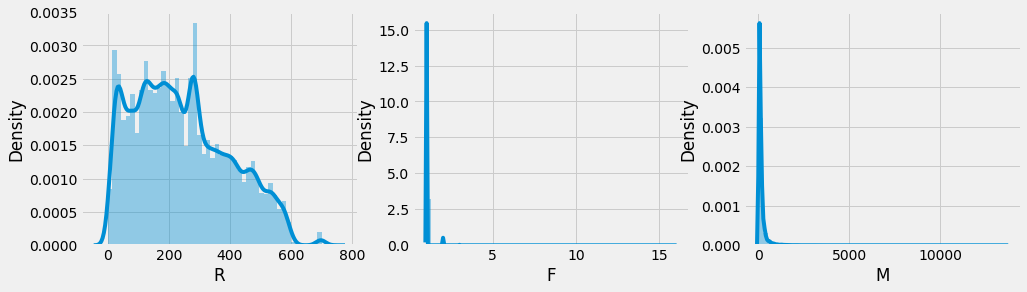

In [231]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes = axes.flatten()

for col, ax in zip(['R', 'F', 'M'], axes):
    sns.distplot(rfm_data[col], ax = ax)
    
plt.show()

In [232]:
percentile = [0.25, 0.5, 0.75, 0.9, 0.99]
rfm_data.R.describe(percentile)

count    94989.000000
mean       244.344482
std        152.993596
min          1.000000
25%        120.000000
50%        225.000000
75%        353.000000
90%        473.000000
99%        581.000000
max        730.000000
Name: R, dtype: float64

In [233]:
rfm_data.F.describe(percentile)

count    94989.000000
mean         1.033867
std          0.210828
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
90%          1.000000
99%          2.000000
max         16.000000
Name: F, dtype: float64

In [234]:
rfm_data.F.value_counts()

1     92101
2      2652
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: F, dtype: int64

In [235]:
rfm_data.M.describe(percentile)

count    94989.000000
mean       165.694312
std        226.740844
min          9.590000
25%         63.100000
50%        107.900000
75%        182.940000
90%        318.970000
99%       1098.665600
max      13664.080000
Name: M, dtype: float64

In [236]:

rfm_data['R_score'] = pd.qcut(rfm_data['R'], 5, labels = [5, 4, 3, 2, 1])\
                      .astype(str)

rfm_data['F_score'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2')

rfm_data['M_score'] = pd.qcut(rfm_data['M'], 5, labels = [1, 2, 3, 4, 5])\
                      .astype(str)
print(
        rfm_data['R_score'].value_counts(normalize=True)\
                           .sort_index(), '\n\n',
        rfm_data['F_score'].value_counts(normalize=True)\
                           .sort_index(),'\n\n',
        rfm_data['M_score'].value_counts(normalize=True)\
                           .sort_index()
       )

1    0.199686
2    0.199276
3    0.200097
4    0.199518
5    0.201423
Name: R_score, dtype: float64 

 1    0.969596
2    0.030404
Name: F_score, dtype: float64 

 1    0.200034
2    0.200002
3    0.199960
4    0.200023
5    0.199981
Name: M_score, dtype: float64


In [237]:
rfm_data.loc[(rfm_data.R_score <='2') & (rfm_data.M_score >='3')]

,customer_unique_id,R,F,M,R_score,F_score,M_score
0,0a0a92112bd4c708ca5fde585afaa872,340,1,13664.08,2,1,5
1,da122df9eeddfedc1dc1f5349a1a690c,521,2,7571.63,1,2,5
3,dc4802a71eae9be1dd28f5d788ceb526,569,1,6929.31,1,1,5
5,ff4159b92c40ebe40454e3e6a7c35ed6,468,1,6726.66,1,1,5
6,4007669dec559734d6f53e029e360987,284,1,6081.54,2,1,5
...,...,...,...,...,...,...,...
56957,b94d9dcc0f4f0ac4d36b8ce9de6d45af,332,1,87.55,2,1,3
56975,acf5cef98a4798f470a2bb70a330ac07,697,1,87.53,1,1,3
56976,2d1768ecedef896a26c0d5db869a4c45,425,1,87.53,1,1,3
56977,2108073aab31d087b1043c32fd9fdc47,697,1,87.53,1,1,3


In [238]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
mms = MinMaxScaler()

rfm_data_cluster = rfm_data[['R', 'F', 'M']]

rfm_data_scaled = mms.fit_transform(rfm_data_cluster)
rfm_data_scaled = pd.DataFrame(rfm_data_scaled, columns=['R', 'F', 'M'])    
rfm_data_scaled.head()

,R,F,M
0,0.465021,0.000000,1.000000
1,0.713306,0.066667,0.553813
2,0.068587,0.000000,0.532081
3,0.779150,0.000000,0.506772
4,0.054870,0.000000,0.506253


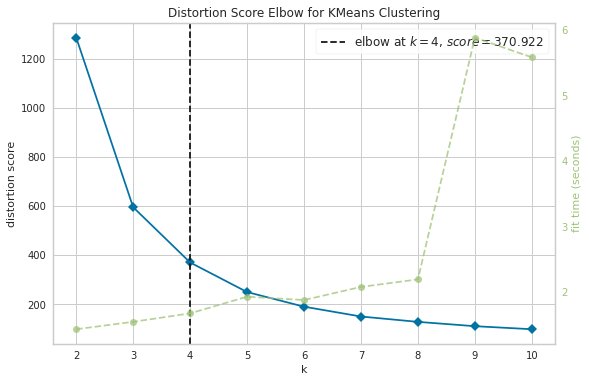

In [239]:
km = KMeans()
elbow = KElbowVisualizer(estimator = km, k = 10)
elbow.fit(rfm_data_scaled)
elbow.show()

plt.show()

In [240]:
km = KMeans(n_clusters = 4, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled)

rfm_data_scaled['cluster'] = clusters
rfm_data_scaled

,R,F,M,cluster
0,0.465021,0.000000,1.000000,0
1,0.713306,0.066667,0.553813,3
2,0.068587,0.000000,0.532081,2
3,0.779150,0.000000,0.506772,3
4,0.054870,0.000000,0.506253,2
...,...,...,...,...
94984,0.502058,0.000000,0.000149,0
94985,0.423868,0.000000,0.000149,0
94986,0.101509,0.000000,0.000095,2
94987,0.486968,0.000000,0.000035,0


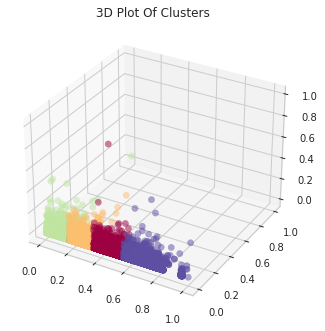

In [241]:
x = rfm_data_scaled['R']
y = rfm_data_scaled['F']
z = rfm_data_scaled['M']

fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 40, c = rfm_data_scaled['cluster'], marker = 'o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("3D Plot Of Clusters")
plt.show()

In [242]:
rfm_data['cluster'] = rfm_data_scaled['cluster']
rfm_data['cluster'].value_counts().sort_index()

0    24736
1    27559
2    25686
3    17008
Name: cluster, dtype: int64

In [243]:
rfm_data.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.032463  166.494560  319.849612  0.190425  230.149246  43.299176
1        1.035560  162.068577  189.382525  0.216286  201.424028  35.177576
2        1.039126  169.890037   67.931558  0.244518  238.071684  35.910791
3        1.025223  164.068919  490.013817  0.171151  242.311140  59.218055

In [244]:
tmp = rfm_data.pivot_table(index = 'cluster', values=['R', 'F', 'M'], aggfunc=['mean', 'std'])
tmp

mean                               std                       
                F           M           R         F           M          R
cluster                                                                   
0        1.032463  166.494560  319.849612  0.190425  230.149246  43.299176
1        1.035560  162.068577  189.382525  0.216286  201.424028  35.177576
2        1.039126  169.890037   67.931558  0.244518  238.071684  35.910791
3        1.025223  164.068919  490.013817  0.171151  242.311140  59.218055

In [245]:
cv_r_0 = tmp[('std', 'R')][0] / tmp[('mean', 'R')][0]
cv_r_1 = tmp[('std', 'R')][1] / tmp[('mean', 'R')][1]
cv_r_2 = tmp[('std', 'R')][2] / tmp[('mean', 'R')][2]
cv_r_3 = tmp[('std', 'R')][3] / tmp[('mean', 'R')][3]

w_r = np.min([cv_r_0, cv_r_1, cv_r_2, cv_r_3]) / np.sum([cv_r_0, cv_r_1, cv_r_2, cv_r_3])
w_r

0.12450985269230284

In [246]:
cv_f_0 = tmp[('std', 'F')][0] / tmp[('mean', 'F')][0]
cv_f_1 = tmp[('std', 'F')][1] / tmp[('mean', 'F')][1]
cv_f_2 = tmp[('std', 'F')][2] / tmp[('mean', 'F')][2]
cv_f_3 = tmp[('std', 'F')][3] / tmp[('mean', 'F')][3]

w_f = np.min([cv_f_0, cv_f_1, cv_f_2, cv_f_3]) / np.sum([cv_f_0, cv_f_1, cv_f_2, cv_f_3])
w_f

0.20984297137594443

In [247]:
cv_m_0 = tmp[('std', 'M')][0] / tmp[('mean', 'M')][0]
cv_m_1 = tmp[('std', 'M')][1] / tmp[('mean', 'M')][1]
cv_m_2 = tmp[('std', 'M')][2] / tmp[('mean', 'M')][2]
cv_m_3 = tmp[('std', 'M')][3] / tmp[('mean', 'M')][3]

w_m = np.min([cv_m_0, cv_m_1, cv_m_2, cv_m_3]) / np.sum([cv_m_0, cv_m_1, cv_m_2, cv_m_3])
w_m

0.22583112217170953

In [248]:
W_R = w_r / (w_r + w_f + w_m)
W_F = w_f / (w_r + w_f + w_m)
W_M = w_m / (w_r + w_f + w_m)

print(f'Weight of Recency  : {W_R}')
print(f'Weight of Frequency: {W_F}')
print(f'Weight of Monetary : {W_M}')
print(f'Total sum of weight: {np.sum([W_R, W_F, W_M])}')

Weight of Recency  : 0.2222660137407233
Weight of Frequency: 0.37459654598180403
Weight of Monetary : 0.4031374402774726
Total sum of weight: 1.0


In [249]:
rfm_data['RFM_score'] = (rfm_data['R_score'].astype('int64') * W_R / 5 * 100 \
                        + rfm_data['F_score'].astype('int64') * W_F / 2 * 100 \
                        + rfm_data['M_score'].astype('int64') * W_M / 5 * 100)

rfm_data.head()

,customer_unique_id,R,F,M,R_score,F_score,M_score,cluster,RFM_score
0,0a0a92112bd4c708ca5fde585afaa872,340,1,13664.08,2,1,5,0,67.934212
1,da122df9eeddfedc1dc1f5349a1a690c,521,2,7571.63,1,2,5,3,82.218719
2,763c8b1c9c68a0229c42c9fc6f662b93,51,1,7274.88,5,1,5,2,81.270173
3,dc4802a71eae9be1dd28f5d788ceb526,569,1,6929.31,1,1,5,3,63.488892
4,459bef486812aa25204be022145caa62,41,1,6922.21,5,1,5,2,81.270173


In [250]:
rfm_data.RFM_score.describe()

count    94989.000000
mean        56.839328
std         13.965924
min         31.237896
25%         47.363394
50%         56.254035
75%         67.934212
max        100.000000
Name: RFM_score, dtype: float64

In [251]:
rfm_data.pivot_table(index = 'RFM_score', values=['R', 'F', 'M'], aggfunc=['mean', 'count'])

mean                         count            
                   F           M           R     F     M     R
RFM_score                                                     
31.237896   1.000000   39.715520  482.486562  3944  3944  3944
35.683217   1.000000   40.053410  322.024793  3630  3630  3630
39.300645   1.000000   71.087226  478.084525  3987  3987  3987
40.128537   1.000000   39.564906  225.149545  3952  3952  3952
43.745965   1.000000   70.470080  323.866036  4016  4016  4016
44.573857   1.000000   39.824733  142.277975  3655  3655  3655
47.363394   1.000000  109.319094  478.777115  3688  3688  3688
48.191286   1.000000   70.449423  226.705882  3672  3672  3672
49.019177   1.000000   39.541983   50.926951  3792  3792  3792
49.967724   2.125000   41.708750  544.125000     8     8     8
51.808714   1.000000  108.629715  323.177066  3654  3654  3654
52.636606   1.000000   70.442298  142.554931  3559  3559  3559
54.413044   2.000000   46.663333  346.000000     3     3     3
55.426143   1.000000  164.320825  479.276845  3334  3334  3334
56.254035   1.000000  108.281855  227.753983  3703  3703  3703
57.081926   1.000000   70.576537   49.589836  3601  3601  3601
58.030472   2.076923   73.822051  488.358974    39    39    39
58.858364   2.000000   44.930000  196.000000     2     2     2
59.871463   1.000000  165.348355  321.981597  3532  3532  3532
60.699355   1.000000  108.319860  140.263102  3778  3778  3778
62.475793   2.000000   74.199167  320.388889    36    36    36
63.303685   2.000000   46.547778  146.888889     9     9     9
63.488892   1.000000  444.318309  484.421910  3560  3560  3560
64.316783   1.000000  165.142431  226.973754  3772  3772  3772
65.144675   1.000000  108.617700   51.584881  3770  3770  3770
66.093221   2.125000  110.294583  466.458333    72    72    72
66.921113   2.000000   74.376800  219.360000    25    25    25
67.749005   2.000000   42.865000   62.000000     6     6     6
67.934212   1.000000  454.431625  322.803176  3526  3526  3526
68.762104   1.000000  166.064532  142.968783  3844  3844  3844
70.538542   2.010753  114.581398  319.935484    93    93    93
71.366433   2.000000   74.153871  137.258065    31    31    31
72.379532   1.000000  411.797726  227.007599  3290  3290  3290
73.207424   1.000000  165.793217   52.293235  3799  3799  3799
74.155970   2.043860  168.722281  472.815789   114   114   114
74.983862   2.023529  110.438824  228.894118    85    85    85
75.811754   2.000000   73.272813   44.500000    32    32    32
76.824852   1.000000  452.380997  142.482112  3522  3522  3522
78.601290   2.062069  169.299655  323.924138   145   145   145
79.429182   2.013889  110.459306  142.291667    72    72    72
81.270173   1.000000  451.511173   53.410963  3521  3521  3521
82.218719   2.081081  446.144550  467.770270   222   222   222
83.046611   2.037975  172.739051  222.215190   158   158   158
83.874502   2.050633  113.081646   54.594937    79    79    79
86.664039   2.115646  455.461054  325.993197   294   294   294
87.491931   2.072848  170.704570  141.066225   151   151   151
91.109359   2.132184  433.737615  224.767241   348   348   348
91.937251   2.033113  168.761656   52.589404   151   151   151
95.554680   2.214502  462.974048  141.184290   331   331   331
100.000000  2.269634  452.619188   53.000000   382   382   382

In [252]:
rfm_data['class'] = pd.qcut(rfm_data.RFM_score, 5, labels = [5, 4, 3, 2, 1]).astype(str)
rfm_data.head(10)

,customer_unique_id,R,F,M,R_score,F_score,M_score,cluster,RFM_score,class
0,0a0a92112bd4c708ca5fde585afaa872,340,1,13664.08,2,1,5,0,67.934212,2
1,da122df9eeddfedc1dc1f5349a1a690c,521,2,7571.63,1,2,5,3,82.218719,1
2,763c8b1c9c68a0229c42c9fc6f662b93,51,1,7274.88,5,1,5,2,81.270173,1
3,dc4802a71eae9be1dd28f5d788ceb526,569,1,6929.31,1,1,5,3,63.488892,2
4,459bef486812aa25204be022145caa62,41,1,6922.21,5,1,5,2,81.270173,1
5,ff4159b92c40ebe40454e3e6a7c35ed6,468,1,6726.66,1,1,5,3,63.488892,2
6,4007669dec559734d6f53e029e360987,284,1,6081.54,2,1,5,0,67.934212,2
7,eebb5dda148d3893cdaf5b5ca3040ccb,504,1,4764.34,1,1,5,3,63.488892,2
8,48e1ac109decbb87765a3eade6854098,74,1,4681.78,5,1,5,2,81.270173,1
9,c8460e4251689ba205045f3ea17884a1,27,4,4655.91,5,2,5,2,100.000000,1


In [253]:
from scipy import stats
cls1_r = rfm_data[rfm_data['class'] == '1']['R']
cls2_r = rfm_data[rfm_data['class'] == '2']['R']
cls3_r = rfm_data[rfm_data['class'] == '3']['R']
cls4_r = rfm_data[rfm_data['class'] == '4']['R']
cls5_r = rfm_data[rfm_data['class'] == '5']['R']

stats.f_oneway(cls1_r, cls2_r, cls3_r, cls4_r, cls5_r)

F_onewayResult(statistic=7196.653382170477, pvalue=0.0)

In [254]:
cls1_f = rfm_data[rfm_data['class'] == '1']['F']
cls2_f = rfm_data[rfm_data['class'] == '2']['F']
cls3_f = rfm_data[rfm_data['class'] == '3']['F']
cls4_f = rfm_data[rfm_data['class'] == '4']['F']
cls5_f = rfm_data[rfm_data['class'] == '5']['F']

stats.f_oneway(cls1_f, cls2_f, cls3_f, cls4_f, cls5_f)

F_onewayResult(statistic=2685.608963926554, pvalue=0.0)

In [255]:
cls1_m = rfm_data[rfm_data['class'] == '1']['M']
cls2_m = rfm_data[rfm_data['class'] == '2']['M']
cls3_m = rfm_data[rfm_data['class'] == '3']['M']
cls4_m = rfm_data[rfm_data['class'] == '4']['M']
cls5_m = rfm_data[rfm_data['class'] == '5']['M']

stats.f_oneway(cls1_m, cls2_m, cls3_m, cls4_m, cls5_m)

F_onewayResult(statistic=8315.721840478536, pvalue=0.0)